In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import sys
import sklearn.tree as tree
import pylab as pl
import scipy.optimize as opt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss

In [2]:
#read in data set--note that no header is included in this set
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',sep=',',header=None)

In [3]:
#output size of raw data for reference
df.shape

(690, 16)

In [4]:
#see if there are any rows with NaN entries
df[df.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


In [5]:
#see if there are any rows with null entries
df[df.isnull().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


In [6]:
#get a look at raw data (beginning)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [7]:
#get a look at raw data (ending)

In [8]:
#name the columns by the attributes given by the data info page (https://archive.ics.uci.edu/ml/datasets/Credit+Approval)
nameAttributes=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

In [9]:
df.columns=nameAttributes

In [10]:
#confirm dataframe still same size
df.shape

(690, 16)

In [11]:
#take a look at dataframe with attribute labels
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [12]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [13]:
#take a look at values of first attribute to see if it matches data info page
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [14]:
#it is clear that data is incomplete, even though incomplete values weren't labeled with NaN or null
#for convenience, let's just remove all samples that aren't complete by replacing '?' with NaN and then removing all rows with NaN
df=df.replace(to_replace='?',value=np.nan)

In [15]:
#for reminder list size of dataframe before removing rows
df.shape

(690, 16)

In [16]:
#remove all samples with incomplete data
df=df.dropna()

In [17]:
#display size of dataframe with only complete samples
df.shape

(653, 16)

In [18]:
#go through all attributes to see if there are any that have 'lost' an option
#(e.g., was binary and now all samples have identical values, or would need one-hot coding but are now binary)

In [19]:
df['A1'].value_counts()

b    450
a    203
Name: A1, dtype: int64

In [20]:
df['A2'].value_counts()

22.67    9
23.58    6
25.00    6
19.17    6
18.83    6
        ..
47.25    1
35.58    1
36.25    1
44.00    1
38.42    1
Name: A2, Length: 340, dtype: int64

In [21]:
df['A3'].value_counts()

2.500     19
1.500     19
3.000     18
0.750     16
1.250     16
          ..
12.125     1
13.915     1
22.000     1
12.835     1
10.915     1
Name: A3, Length: 213, dtype: int64

In [22]:
df['A4'].value_counts()

u    499
y    152
l      2
Name: A4, dtype: int64

In [23]:
df['A5'].value_counts()

g     499
p     152
gg      2
Name: A5, dtype: int64

In [24]:
df['A6'].value_counts()

c     133
q      75
w      63
i      55
aa     52
ff     50
k      48
cc     40
m      38
x      36
d      26
e      24
j      10
r       3
Name: A6, dtype: int64

In [25]:
df['A7'].value_counts()

v     381
h     137
ff     54
bb     53
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64

In [26]:
df['A8'].value_counts()

0.000    60
0.040    32
0.250    32
1.000    30
0.125    29
         ..
1.960     1
3.960     1
2.040     1
1.040     1
5.375     1
Name: A8, Length: 131, dtype: int64

In [27]:
df['A9'].value_counts()

t    349
f    304
Name: A9, dtype: int64

In [28]:
df['A10'].value_counts()

f    366
t    287
Name: A10, dtype: int64

In [29]:
df['A11'].value_counts()

0     366
1      69
2      42
3      27
6      22
11     19
5      17
7      16
4      15
8      10
9      10
14      8
12      8
10      8
15      4
16      3
17      2
20      2
40      1
13      1
19      1
23      1
67      1
Name: A11, dtype: int64

In [30]:
df['A12'].value_counts()

f    351
t    302
Name: A12, dtype: int64

In [31]:
df['A13'].value_counts()

g    598
s     53
p      2
Name: A13, dtype: int64

In [32]:
df['A14'].value_counts()

00000    128
00120     35
00200     33
00160     33
00100     30
        ... 
00186      1
00224      1
00487      1
00030      1
00167      1
Name: A14, Length: 164, dtype: int64

In [33]:
df['A15'].value_counts()

0       275
1        27
1000     10
500      10
2         9
       ... 
6590      1
444       1
1465      1
5552      1
283       1
Name: A15, Length: 229, dtype: int64

In [34]:
df['A16'].value_counts()

-    357
+    296
Name: A16, dtype: int64

In [35]:
#turn binary attribute terms into numerical values
df['A1'].replace(to_replace=['a','b'], value=[1,0],inplace=True)
df['A9'].replace(to_replace=['t','f'], value=[1,0],inplace=True)
df['A10'].replace(to_replace=['t','f'], value=[1,0],inplace=True)
df['A12'].replace(to_replace=['t','f'], value=[1,0],inplace=True)

In [36]:
#do one hot encoding for remaining attributes
tempDummy=pd.get_dummies(df.A4,prefix='A4')
df = pd.concat([df, tempDummy], axis=1).drop('A4', axis=1)

tempDummy=pd.get_dummies(df.A5,prefix='A5')
df = pd.concat([df, tempDummy], axis=1).drop('A5', axis=1)

tempDummy=pd.get_dummies(df.A6,prefix='A6')
df = pd.concat([df, tempDummy], axis=1).drop('A6', axis=1)

tempDummy=pd.get_dummies(df.A7,prefix='A7')
df = pd.concat([df, tempDummy], axis=1).drop('A7', axis=1)

tempDummy=pd.get_dummies(df.A13,prefix='A13')
df = pd.concat([df, tempDummy], axis=1).drop('A13', axis=1)


In [37]:
#see size after one hot encoding--can count from value counts section to confirm size
df.shape

(653, 43)

In [38]:
#look at portion of dataframe
print(df.tail(15))

     A1     A2      A3     A8  A9  A10  A11  A12    A14  A15  ... A7_ff  A7_h  \
675   1  41.58   1.040  0.665   0    0    0    0  00240  237  ...     0     0   
676   1  30.58  10.665  0.085   0    1   12    1  00129    3  ...     0     1   
677   0  19.42   7.250  0.040   0    1    1    0  00100    1  ...     0     0   
678   1  17.92  10.210  0.000   0    0    0    0  00000   50  ...     1     0   
679   1  20.08   1.250  0.000   0    0    0    0  00000    0  ...     0     0   
680   0  19.50   0.290  0.290   0    0    0    0  00280  364  ...     0     0   
681   0  27.83   1.000  3.000   0    0    0    0  00176  537  ...     0     1   
682   0  17.08   3.290  0.335   0    0    0    1  00140    2  ...     0     0   
683   0  36.42   0.750  0.585   0    0    0    0  00240    3  ...     0     0   
684   0  40.58   3.290  3.500   0    0    0    1  00400    0  ...     0     0   
685   0  21.08  10.085  1.250   0    0    0    0  00260    0  ...     0     1   
686   1  22.67   0.750  2.00

In [39]:
#separate features and label

In [40]:
#define feature set by removing label (A16--'approve' or 'not approve')
X=df.drop('A16',axis=1)

In [41]:
#confirm feature set size
X.shape

(653, 42)

In [42]:
#define label
y=df['A16'].values

In [43]:
#confirm label is correct by comparing to 'A16' counts above
print('-: ',np.count_nonzero(y=='-'),'\n+: ',np.count_nonzero(y=='+'))

-:  357 
+:  296


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
#normalize data
X= StandardScaler().fit(X).transform(X)

In [46]:
#separate data into train and test sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (522, 42) (522,)
Test set: (131, 42) (131,)


In [48]:
#K nearest neighbors

In [49]:
#see which is best number of closest points
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    print('K =',n)
    print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))
    print(' ')

print( 'The best accuracy was with', mean_acc.max(), 'with k=', mean_acc.argmax()+1) 

K = 1
Train set Accuracy:  1.0
Test set Accuracy:  0.7938931297709924
 
K = 2
Train set Accuracy:  0.8888888888888888
Test set Accuracy:  0.7786259541984732
 
K = 3
Train set Accuracy:  0.8831417624521073
Test set Accuracy:  0.8015267175572519
 
K = 4
Train set Accuracy:  0.8390804597701149
Test set Accuracy:  0.8015267175572519
 
K = 5
Train set Accuracy:  0.8333333333333334
Test set Accuracy:  0.8091603053435115
 
K = 6
Train set Accuracy:  0.8352490421455939
Test set Accuracy:  0.7633587786259542
 
K = 7
Train set Accuracy:  0.8333333333333334
Test set Accuracy:  0.7862595419847328
 
K = 8
Train set Accuracy:  0.8295019157088123
Test set Accuracy:  0.7709923664122137
 
K = 9
Train set Accuracy:  0.8256704980842912
Test set Accuracy:  0.8015267175572519
 
K = 10
Train set Accuracy:  0.8275862068965517
Test set Accuracy:  0.8091603053435115
 
K = 11
Train set Accuracy:  0.8180076628352491
Test set Accuracy:  0.8015267175572519
 
K = 12
Train set Accuracy:  0.8275862068965517
Test set 

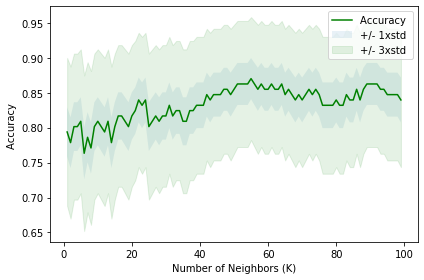

In [50]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color='green')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [51]:
#best seems to be k=55; inflection point in accuracy appears around there as well

In [52]:
#run model at optimum k-value
knn = KNeighborsClassifier(n_neighbors = 55)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of K-NN classifier on training set: 0.8199
Accuracy of K-NN classifier on test set: 0.8702
[[43 17]
 [ 0 71]]
              precision    recall  f1-score   support

           +       1.00      0.72      0.83        60
           -       0.81      1.00      0.89        71

    accuracy                           0.87       131
   macro avg       0.90      0.86      0.86       131
weighted avg       0.90      0.87      0.87       131



In [53]:
#some metrics of performance:
print('Avg F1-score: %.4f' % f1_score(y_test, yhat, average='weighted'))
print('Jaccard score: %.4f' % jaccard_score(y_test, yhat,pos_label='+'))

Avg F1-score: 0.8350
Jaccard score: 0.6613


In [54]:
#decision tree

In [55]:
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
predictionTree = decisionTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predictionTree))

DecisionTrees's Accuracy:  0.8931297709923665


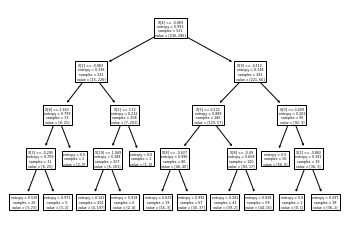

In [57]:
tree.plot_tree(decisionTree)
plt.show()

In [58]:
#some metrics of performance:
print('Avg F1-score: %.4f' % f1_score(y_test, predictionTree, average='weighted'))
print('Jaccard score: %.4f' % jaccard_score(y_test, yhat,pos_label='+'))

Avg F1-score: 0.8925
Jaccard score: 0.6613


In [59]:
#support vector machine

In [60]:
#plotting tool
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
#linear fit
clf = svm.SVC(kernel='linear')

In [62]:
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

              precision    recall  f1-score   support

           +       0.83      0.90      0.86        60
           -       0.91      0.85      0.88        71

    accuracy                           0.87       131
   macro avg       0.87      0.87      0.87       131
weighted avg       0.87      0.87      0.87       131

Confusion matrix, without normalization
[[60 11]
 [ 6 54]]


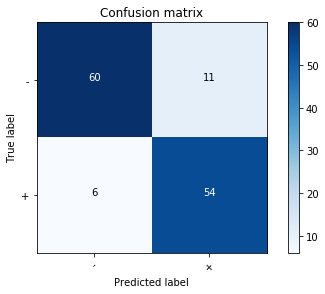

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['-','+'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['-','+'],normalize= False,  title='Confusion matrix')

In [64]:
#some metrics of performance:
print('Avg F1-score: %.4f' % f1_score(y_test, yhat, average='weighted'))
print('Jaccard score: %.4f' % jaccard_score(y_test, yhat,pos_label='+'))

Avg F1-score: 0.8705
Jaccard score: 0.7606


In [65]:
#polynomial fit
clf = svm.SVC(kernel='poly')

In [66]:
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

              precision    recall  f1-score   support

           +       0.85      0.77      0.81        60
           -       0.82      0.89      0.85        71

    accuracy                           0.83       131
   macro avg       0.84      0.83      0.83       131
weighted avg       0.83      0.83      0.83       131

Confusion matrix, without normalization
[[63  8]
 [14 46]]


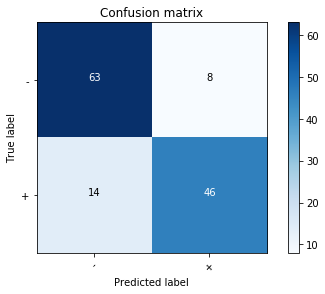

In [67]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['-','+'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['-','+'],normalize= False,  title='Confusion matrix')

In [68]:
#some metrics of performance:
print('Avg F1-score: %.4f' % f1_score(y_test, yhat, average='weighted'))
print('Jaccard score: %.4f' % jaccard_score(y_test, yhat,pos_label='+'))

Avg F1-score: 0.8310
Jaccard score: 0.6765


In [69]:
#radial basis function fit
clf = svm.SVC(kernel='rbf')

In [70]:
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

              precision    recall  f1-score   support

           +       0.83      0.83      0.83        60
           -       0.86      0.86      0.86        71

    accuracy                           0.85       131
   macro avg       0.85      0.85      0.85       131
weighted avg       0.85      0.85      0.85       131

Confusion matrix, without normalization
[[61 10]
 [10 50]]


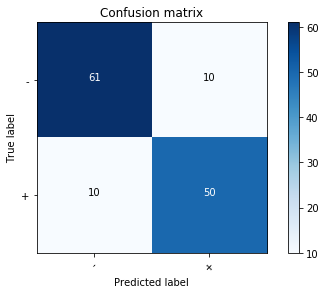

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['-','+'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['-','+'],normalize= False,  title='Confusion matrix')

In [72]:
#some metrics of performance:
print('Avg F1-score: %.4f' % f1_score(y_test, yhat, average='weighted'))
print('Jaccard score: %.4f' % jaccard_score(y_test, yhat,pos_label='+'))

Avg F1-score: 0.8473
Jaccard score: 0.7143


In [73]:
#sigmoid fit
clf = svm.SVC(kernel='sigmoid')

In [74]:
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

              precision    recall  f1-score   support

           +       0.83      0.95      0.88        60
           -       0.95      0.83      0.89        71

    accuracy                           0.89       131
   macro avg       0.89      0.89      0.89       131
weighted avg       0.89      0.89      0.89       131

Confusion matrix, without normalization
[[59 12]
 [ 3 57]]


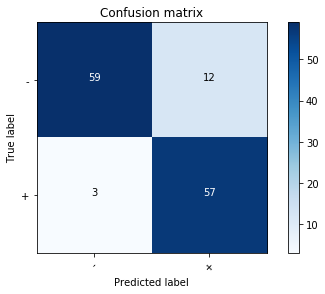

In [75]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['-','+'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['-','+'],normalize= False,  title='Confusion matrix')

In [76]:
#some metrics of performance:
print('Avg F1-score: %.4f' % f1_score(y_test, yhat, average='weighted'))
print('Jaccard score: %.4f' % jaccard_score(y_test, yhat,pos_label='+'))

Avg F1-score: 0.8856
Jaccard score: 0.7917


In [77]:
#logistic regression

In [78]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

              precision    recall  f1-score   support

           +       0.88      0.82      0.84        60
           -       0.85      0.90      0.88        71

    accuracy                           0.86       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.86      0.86      0.86       131

Confusion matrix, without normalization
[[64  7]
 [11 49]]


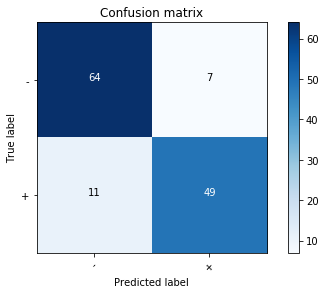

In [79]:
print (classification_report(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['-','+'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['-','+'],normalize= False,  title='Confusion matrix')

In [80]:
#some metrics of performance:
print('Avg F1-score: %.4f' % f1_score(y_test, yhat, average='weighted'))
print('Jaccard score: %.4f' % jaccard_score(y_test, yhat,pos_label='+'))

Avg F1-score: 0.8621
Jaccard score: 0.7313
